In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Installing Segment Anything git

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-80e0fcqr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-80e0fcqr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=d36d378bf92eead4a359330225942415e3ba85295074a5404e93653063443540
  Stored in directory: /tmp/pip-ephem-wheel-cache-x5w6iyyk/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
import cv2

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


## Defining the annotation and segmentations

In [ ]:
import numpy as np
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

## Loading the SAM vit-b Model

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

In [ ]:
model_type = "vit_b"
samcheckpoint = "/content/drive/MyDrive/SAM/sam_vit_b_01ec64.pth"
sam = sam_model_registry[model_type](checkpoint=samcheckpoint)
mask_generator = SamAutomaticMaskGenerator(sam)

## Loading a high resolution image

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Datasets/ref.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
masks = mask_generator.generate(image)

In [ ]:
print(len(masks))
print(masks[0].keys())

10
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


## Original Image

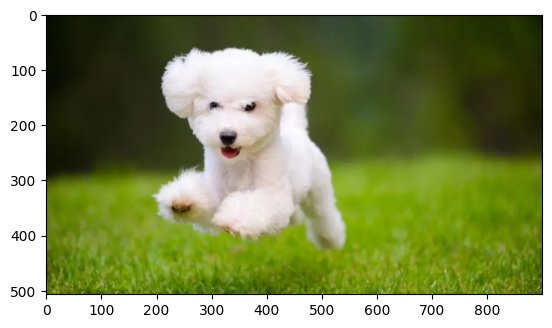

In [ ]:
plt.imshow(image)

## Segmented Image of high-resolution image

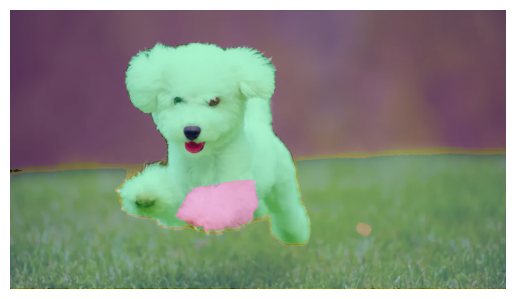

In [ ]:
plt.imshow(image)
show_anns(masks) # Showing segmentation
plt.axis('off')
plt.show()

## Same mask configuration for low resolution image

In [ ]:
masks = mask_generator.generate(X_train[785])

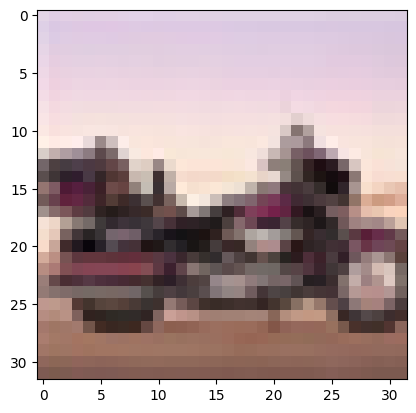

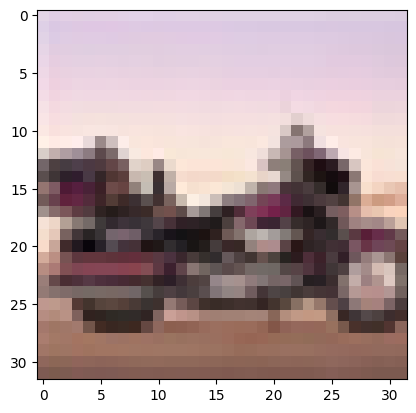

In [ ]:
plt.imshow(X_train[785])

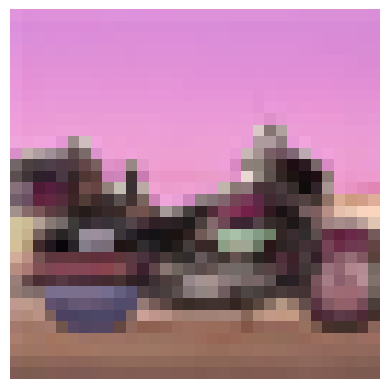

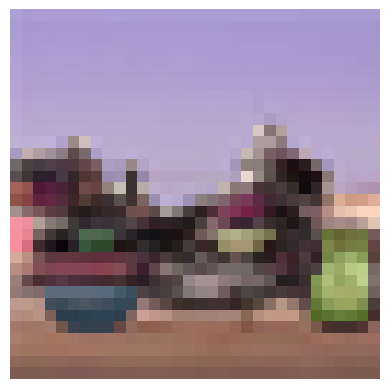

In [ ]:
plt.imshow(X_train[785])
show_anns(masks) # Showing segmentation
plt.axis('off')
plt.show()

## Hyperparameter-Tuning the mask generator for low-resolution images

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,
)

In [ ]:
masks2 = mask_generator_2.generate(X_train[785])

Original Image

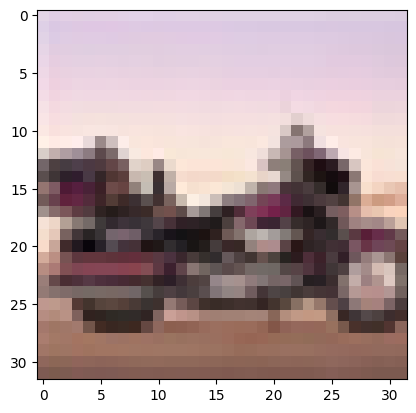

In [ ]:
plt.imshow(X_train[785])

Segmentation of lower-resolution image

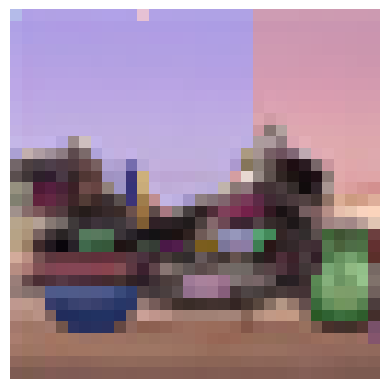

In [ ]:
plt.imshow(X_train[785])
show_anns(masks2) # Showing segmentation
plt.axis('off')
plt.show()